In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from scipy import special

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
az.style.use("arviz-white")

In [4]:
length = [
    1.3, 1.32, 1.32, 1.4, 1.42, 1.42, 1.47, 1.47, 1.5, 1.52, 1.63, 1.65, 1.65, 1.65, 1.65,
    1.68, 1.7, 1.73, 1.78, 1.78, 1.8, 1.85, 1.93, 1.93, 1.98, 2.03, 2.03, 2.31, 2.36, 2.46,
    3.25, 3.28, 3.33, 3.56, 3.58, 3.66, 3.68, 3.71, 3.89, 1.24, 1.3, 1.45, 1.45, 1.55, 1.6, 
    1.6, 1.65, 1.78, 1.78, 1.8, 1.88, 2.16, 2.26, 2.31, 2.36, 2.39, 2.41, 2.44, 2.56, 2.67, 
    2.72, 2.79, 2.84
]
choice = [
    "I", "F", "F", "F", "I", "F", "I", "F", "I", "I", "I", "O", "O", "I", "F", "F", 
    "I", "O", "F", "O", "F", "F", "I", "F", "I", "F", "F", "F", "F", "F", "O", "O", 
    "F", "F", "F", "F", "O", "F", "F", "I", "I", "I", "O", "I", "I", "I", "F", "I", 
    "O", "I", "I", "F", "F", "F", "F", "F", "F", "F", "O", "F", "I", "F", "F"
]

sex = ["Male"] * 32 + ["Female"] * 31

data = pd.DataFrame({"choice": choice, "length": length, "sex": sex})

data["choice"]  = pd.Categorical(
    data["choice"].map({"I": "Invertebrates", "F": "Fish", "O": "Other"}), 
    ["Other", "Invertebrates", "Fish"], 
    ordered=True
)
data.head(3)

,choice,length,sex
0,Invertebrates,1.30,Male
1,Fish,1.32,Male
2,Fish,1.32,Male


In [5]:
model = bmb.Model("choice ~ length + sex", data, family="categorical")
idata = model.fit()

/home/tomas/anaconda3/envs/bambi/lib/python3.10/site-packages/aesara/tensor/nnet/basic.py:1116: FutureWarning: Softmax now accepts an axis argument. For backwards-compatibility it defaults to -1 when not specified, but in the future the default will be `None`.
To suppress this warning specify axis explicitly.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, length, sex]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


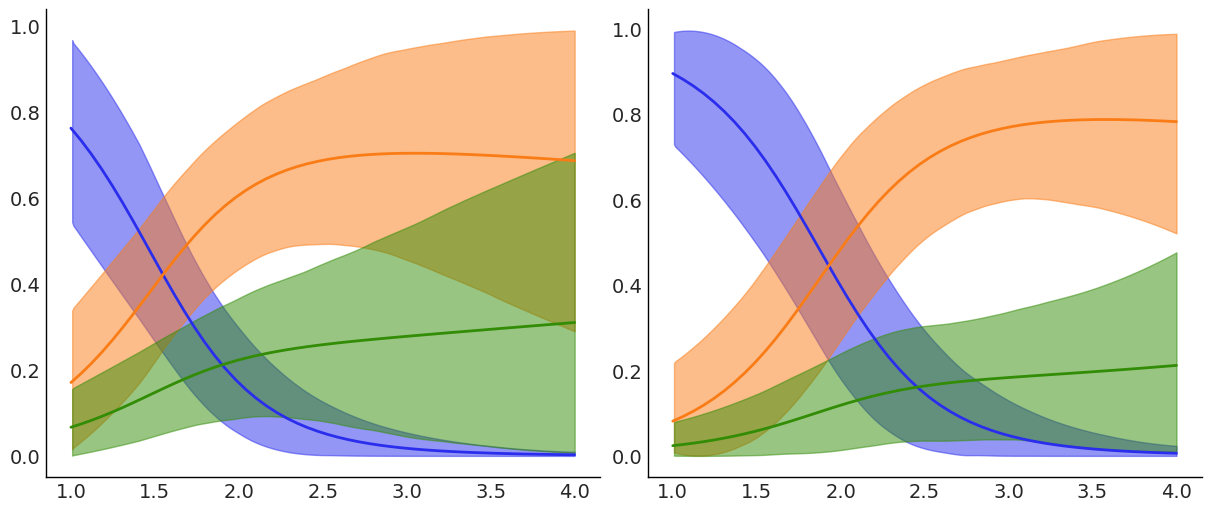

In [13]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})
idata = model.predict_2(idata, data=new_data, inplace=False)
p = idata.posterior["choice_mean"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim":choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim":choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])

In [14]:
p

<xarray.DataArray 'choice_mean' (chain: 2, draw: 1000, choice_obs: 100,
                                 choice_mean_dim: 3)>
array([[[[7.83989607e-01, 1.71948606e-01, 4.40617871e-02],
         [7.50478335e-01, 1.98482236e-01, 5.10394282e-02],
         [7.13666560e-01, 2.27600894e-01, 5.87325458e-02],
         ...,
         [3.40524067e-03, 8.21190824e-01, 1.75403935e-01],
         [2.82382604e-03, 8.21162950e-01, 1.76013224e-01],
         [2.34144541e-03, 8.21051831e-01, 1.76606723e-01]],

        [[7.68833970e-01, 1.92420696e-01, 3.87453344e-02],
         [7.40131791e-01, 2.15451989e-01, 4.44162203e-02],
         [7.09197547e-01, 2.40121420e-01, 5.06810325e-02],
         ...,
         [7.19778659e-03, 6.89925749e-01, 3.02876464e-01],
         [6.15021452e-03, 6.85671160e-01, 3.08178626e-01],
         [5.25368050e-03, 6.81257831e-01, 3.13488488e-01]],

        [[9.42266250e-01, 3.66331008e-02, 2.11006491e-02],
         [9.26420384e-01, 4.73659692e-02, 2.62136471e-02],
         [9.06625207e-01, 6.09599212e-02, 3.24148713e-02],
         ...,
...
         ...,
         [1.20870472e-02, 8.13416964e-01, 1.74495988e-01],
         [1.07063354e-02, 8.13211476e-01, 1.76082189e-01],
         [9.48171072e-03, 8.12866071e-01, 1.77652218e-01]],

        [[8.96961010e-01, 6.06736289e-02, 4.23653615e-02],
         [8.66939158e-01, 7.87289874e-02, 5.43318544e-02],
         [8.29824858e-01, 1.01170088e-01, 6.90050547e-02],
         ...,
         [1.22178610e-04, 8.21089394e-01, 1.78788427e-01],
         [9.12000261e-05, 8.22829522e-01, 1.77079278e-01],
         [6.80742142e-05, 8.24550347e-01, 1.75381578e-01]],

        [[8.23068704e-01, 1.20683187e-01, 5.62481094e-02],
         [7.92793128e-01, 1.42842747e-01, 6.43641247e-02],
         [7.58810033e-01, 1.68003766e-01, 7.31862011e-02],
         ...,
         [8.42458311e-04, 9.12519767e-01, 8.66377752e-02],
         [6.87671662e-04, 9.15298234e-01, 8.40140942e-02],
         [5.61258987e-04, 9.17978352e-01, 8.14603888e-02]]]])
Coordinates:
  * chain            (chain) int64 0 1
  * draw             (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * choice_mean_dim  (choice_mean_dim) <U13 'Other' 'Invertebrates' 'Fish'
  * choice_obs       (choice_obs) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99

In [8]:
idata_2 = model.predict_2(idata, data=new_data, inplace=False)

(3, 2000)
(2000,)

In [46]:
np.atleast_2d(np.ones((2000,))).shape

(1, 2000)

In [55]:
p = model.predict_2(idata, kind="pps", inplace=False)
p

<xarray.DataArray (chain: 2, draw: 1000, choice_obs: 63, choice_mean_dim: 3)>
array([[[[0.59105286, 0.32438504, 0.08456209],
         [0.57613684, 0.33613718, 0.08772598],
         [0.57613684, 0.33613718, 0.08772598],
         ...,
         [0.10635075, 0.74476093, 0.14888832],
         [0.08760313, 0.75987721, 0.15251966],
         [0.07609632, 0.76909233, 0.15481135]],

        [[0.60851153, 0.31932797, 0.0721605 ],
         [0.5963497 , 0.32878027, 0.07487003],
         [0.5963497 , 0.32878027, 0.07487003],
         ...,
         [0.12413148, 0.68357736, 0.19229116],
         [0.10596799, 0.69359911, 0.20043289],
         [0.0944608 , 0.6994826 , 0.2060566 ]],

        [[0.82017068, 0.12203934, 0.05778998],
         [0.80724456, 0.13135919, 0.06139625],
         [0.80724456, 0.13135919, 0.06139625],
         ...,
...
         ...,
         [0.11046662, 0.7538889 , 0.13564449],
         [0.09743909, 0.76368477, 0.13887615],
         [0.08898953, 0.76993083, 0.14107964]],

        [[

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

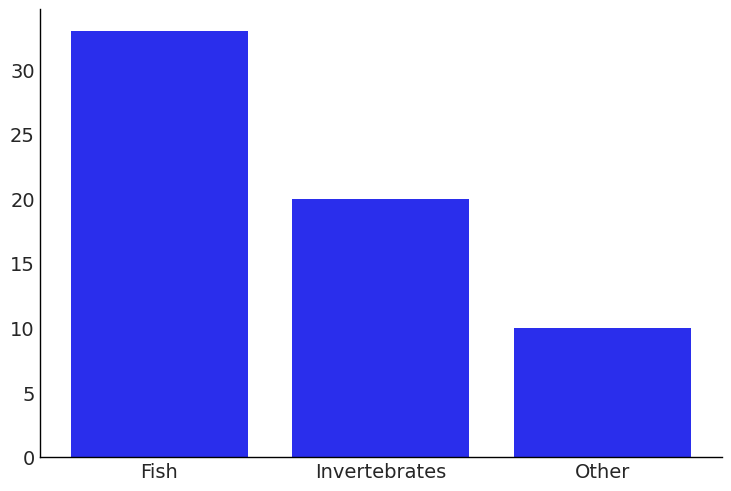

In [61]:
fig, ax = plt.subplots()
labels, counts = np.unique(data["choice"], return_counts=True)
ax.bar(labels, counts);

In [62]:
p

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [60]:
data["choice"]

0     Invertebrates
1              Fish
2              Fish
3              Fish
4     Invertebrates
          ...      
58            Other
59             Fish
60    Invertebrates
61             Fish
62             Fish
Name: choice, Length: 63, dtype: category
Categories (3, object): ['Other' < 'Invertebrates' < 'Fish']

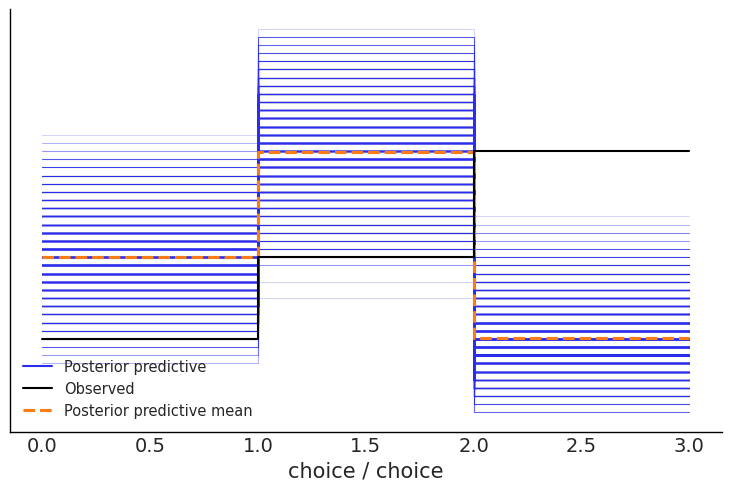

In [54]:
az.plot_ppc(p);

In [32]:
xr.DataArray(p, coords={"chain": np.arange(2), "draw": np.arange(1000), "choice_obs": np.arange(100)})

<xarray.DataArray (chain: 2, draw: 1000, choice_obs: 100)>
array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 1, 1],
        [1, 1, 0, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 0, 0, ..., 2, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 1, 1]]])
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * choice_obs  (choice_obs) int64 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99

In [29]:
p.shape

(2, 1000, 100)

In [ ]:
new_length = np.linspace(1, 4)
new_data = pd.DataFrame({"length": np.tile(new_length, 2), "sex": ["Male"] * 50 + ["Female"] * 50})

In [9]:
# This is general
X_terms = ["Intercept"] + list(model.common_terms)
Z_terms = []

obs_n = len(new_data)
response_dim = model.response.name + "_obs"
response_levels_dim = model.response.name + "_dim"
response_levels_dim_complete = model.response.name + "_mean_dim"

b = idata.posterior[X_terms].to_stacked_array("__variables__", ("chain", "draw", response_levels_dim))
X = model._design.common.evaluate_new_data(new_data).design_matrix
X = xr.DataArray(X, dims=(response_dim, "__variables__"))

linear_predictor = xr.dot(X, b)

# This is Family specific
# Because of reference encoding, we need to padd with 0s for the last level of the response variable
# (0, 1): 0 new levels on the left, 1 new level on the right
linear_predictor = linear_predictor.pad({response_levels_dim: (0, 1)}, constant_values=0)
mean = xr.apply_ufunc(special.softmax, linear_predictor, kwargs={"axis": -1})

# The mean has the reference level in the dimension, a new name is needed
mean = mean.rename({response_levels_dim: response_levels_dim_complete})

idata.posterior["choice_mean"] = mean.assign_coords(
    {
        response_levels_dim_complete: model.response.levels,
        response_dim: list(range(obs_n))
    }
).transpose(
    "chain", "draw", response_dim, response_levels_dim_complete
)

In [11]:
xr.dot(X, b)

<xarray.DataArray (choice_obs: 100, chain: 2, draw: 1000, choice_dim: 2)>
array([[[[ 1.79135043,  0.32648502],
         [ 2.59666714,  0.59169941],
         [ 2.53223497,  0.92301248],
         ...,
         [ 3.29418893,  2.06639233],
         [ 3.81039467,  1.31535896],
         [ 3.49772983,  1.33735697]],

        [[ 1.71558253,  0.67743587],
         [ 1.58118329,  0.24656695],
         [ 2.99138989,  0.13298367],
         ...,
         [ 2.14550364,  0.12651372],
         [ 3.48320533,  2.01386171],
         [ 3.48320533,  2.01386171]]],


       [[[ 1.66387052,  0.35967915],
         [ 2.42121611,  0.57171546],
         [ 2.37794756,  0.95958189],
...
         [-4.93455945,  3.34777667],
         [-4.7385099 ,  0.64333834],
         [-4.7385099 ,  0.64333834]]],


       [[[-2.40191117,  2.98784939],
         [-3.85406352,  1.4064016 ],
         [-5.01978668,  2.46106779],
         ...,
         [-6.19386722,  0.69826795],
         [-5.42019159,  1.58720484],
         [-9.01790226,  0.32239555]],

        [[-4.19752433,  1.23666584],
         [-5.16636199,  2.57418636],
         [-6.36452833,  1.68291653],
         ...,
         [-5.16670999,  3.36165511],
         [-4.90256203,  0.64249679],
         [-4.90256203,  0.64249679]]]])
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * choice_dim  (choice_dim) <U13 'Invertebrates' 'Fish'
Dimensions without coordinates: choice_obs

In [10]:
linear_predictor

<xarray.DataArray (choice_obs: 100, chain: 2, draw: 1000, choice_dim: 3)>
array([[[[ 1.79135043,  0.32648502,  0.        ],
         [ 2.59666714,  0.59169941,  0.        ],
         [ 2.53223497,  0.92301248,  0.        ],
         ...,
         [ 3.29418893,  2.06639233,  0.        ],
         [ 3.81039467,  1.31535896,  0.        ],
         [ 3.49772983,  1.33735697,  0.        ]],

        [[ 1.71558253,  0.67743587,  0.        ],
         [ 1.58118329,  0.24656695,  0.        ],
         [ 2.99138989,  0.13298367,  0.        ],
         ...,
         [ 2.14550364,  0.12651372,  0.        ],
         [ 3.48320533,  2.01386171,  0.        ],
         [ 3.48320533,  2.01386171,  0.        ]]],


       [[[ 1.66387052,  0.35967915,  0.        ],
         [ 2.42121611,  0.57171546,  0.        ],
         [ 2.37794756,  0.95958189,  0.        ],
...
         [-4.93455945,  3.34777667,  0.        ],
         [-4.7385099 ,  0.64333834,  0.        ],
         [-4.7385099 ,  0.64333834,  0.        ]]],


       [[[-2.40191117,  2.98784939,  0.        ],
         [-3.85406352,  1.4064016 ,  0.        ],
         [-5.01978668,  2.46106779,  0.        ],
         ...,
         [-6.19386722,  0.69826795,  0.        ],
         [-5.42019159,  1.58720484,  0.        ],
         [-9.01790226,  0.32239555,  0.        ]],

        [[-4.19752433,  1.23666584,  0.        ],
         [-5.16636199,  2.57418636,  0.        ],
         [-6.36452833,  1.68291653,  0.        ],
         ...,
         [-5.16670999,  3.36165511,  0.        ],
         [-4.90256203,  0.64249679,  0.        ],
         [-4.90256203,  0.64249679,  0.        ]]]])
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * choice_dim  (choice_dim) object 'Invertebrates' 'Fish' nan
Dimensions without coordinates: choice_obs

In [ ]:
idata.posterior["choice_mean"]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
choices = ["Other", "Invertebrates", "Fish"]

p = idata.posterior["choice_mean"]

for j, choice in enumerate(choices):
   males = p.sel({"choice_mean_dim": choice, "choice_obs":slice(0, 49)})
   females = p.sel({"choice_mean_dim": choice, "choice_obs":slice(50, 100)})
   axes[0].plot(new_length, males.mean(("chain", "draw")), color=f"C{j}", lw=2)
   axes[1].plot(new_length, females.mean(("chain", "draw")), color=f"C{j}", lw=2)
   az.plot_hdi(new_length, males, color=f"C{j}", ax=axes[0])
   az.plot_hdi(new_length, females, color=f"C{j}", ax=axes[1])
fig.subplots_adjust(left=0.05, right=0.975, bottom=0.075, top=0.85)